In [ ]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [25]:
c = 14
emission_data = {}
day = '2018-04-01'
emission_days = [day]
while c > 0:
    with open('/Users/mac/gravity/datasets/dataset_9/output_9.1/emission_'+day+'T11:00:00.csv', newline='') as emission:
        emission_data[day] = []
        r = csv.reader(emission, delimiter=';')
        for row in emission:
            row = row.strip().split(';')
            #emission_data[row[0]] = [float(i) for i in row[1:]]
            row = [row[0]]+[float(i) for i in row[1:]]
            emission_data[day].append(row)
        day = add_week(day)
        emission_days.append(day)
        c -=1
emission_days = list(emission_data.keys())

## Emission days

In [233]:
emission_days

['2018-04-01',
 '2018-04-08',
 '2018-04-15',
 '2018-04-22',
 '2018-04-29',
 '2018-05-06',
 '2018-05-13',
 '2018-05-20',
 '2018-05-27',
 '2018-06-03',
 '2018-06-10',
 '2018-06-17',
 '2018-06-24',
 '2018-07-01']

In [113]:
global_emission = []
with open('/Users/mac/gravity/datasets/dataset_9/output_9.1/global_emission.csv', newline='') as file:
    r = csv.reader(file, delimiter=';')
    for row in file:
        row = row.strip().split(';')
        global_emission.append(row)
global_emission = global_emission[1:]

In [32]:
last_peak_activity = [float(i[5]) for i in global_emission]
current_activity = [float(i[4]) for i in global_emission]
delta_current_last = [float(i[4])-float(i[5]) for i in global_emission]

## System activity

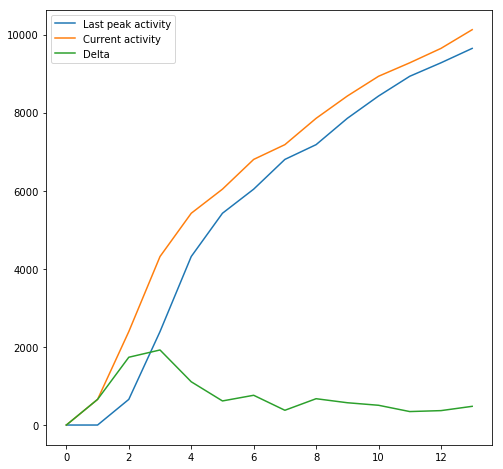

In [77]:
plt.plot(last_peak_activity, label='Last peak activity')
plt.plot(current_activity, label='Current activity')
plt.plot(delta_current_last, label='Delta')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.legend(loc='upper left')
plt.show()

In [111]:
transactions = []
tx_days = []
with open('/Users/mac/gravity/datasets/dataset_9/transaction_history9.csv', newline='') as file:
    r = csv.reader(file, delimiter=';')
    for row in file:
        row = row.strip().split(';')
        transactions.append(row)
        if row[0][0:10] not in tx_days:
            tx_days.append(row[0][0:10])

In [69]:
volumes = []
emission_volumes = {}
tx_count = []
for day in emission_days[:-1]:
    emission_volumes[day] = 0
    index = emission_days.index(day)
    count = 0
    for row in transactions:
        if row[0][0:10] >= day and row[0][0:10] < emission_days[index+1]:
            emission_volumes[day] += float(row[3])
            count +=1
    volumes.append(emission_volumes[day])
    tx_count.append(count)

## Weekly dynamics

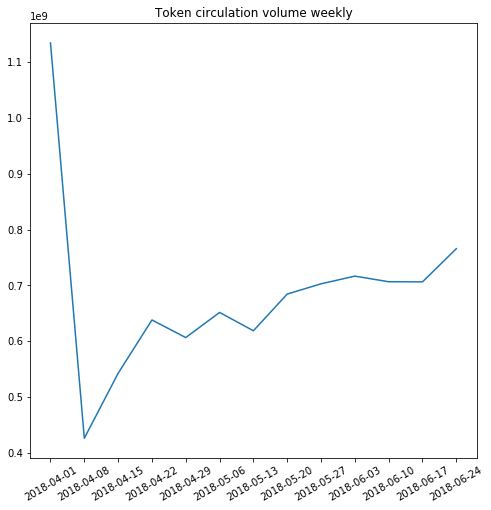

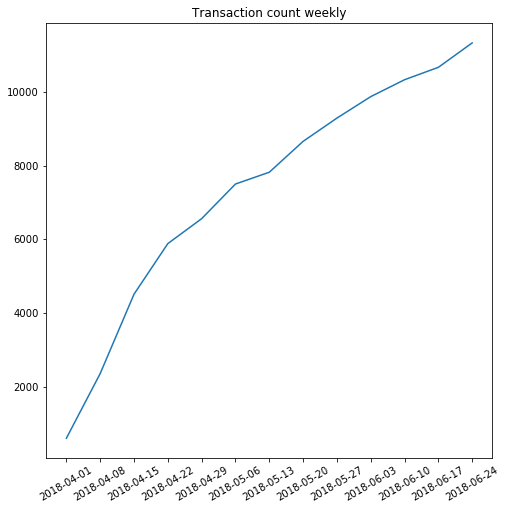

In [74]:
plt.plot(volumes)
plt.title('Token circulation volume weekly')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(range(len(emission_days[:-1])), emission_days[:-1], rotation=30)
plt.show()
plt.plot(tx_count)
plt.title('Transaction count weekly')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(range(len(emission_days[:-1])), emission_days[:-1], rotation=30)
plt.show()

In [106]:
address = 'g1791u5098w9228'
def plot_activity(address, account_type):
    balances = [0]
    for tx in transactions:
        if tx[1] == address:
            b = balances[-1] - float(tx[3])
            balances.append(b)
        elif tx[2] == address:
            b = balances[-1] + float(tx[3])
            balances.append(b)
    print(account_type, len(balances)-1, 'transactions')
    plt.plot(balances)
    plt.title('Account activity')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.ylabel('Balance')
    plt.xlabel('Transaction count')
    plt.show()

In [207]:
def daily_activity(address, account_type):
    balances = [0]
    for day in tx_days:
        b = balances[-1]
        for tx in transactions:
            if tx[0][0:10] == day:
                if tx[1] == address:
                    #print(balances[-1], float(tx[3]))
                    b = balances[-1] - float(tx[3]) - 20
                    balances[-1] = b
                elif tx[2] == address:
                    #print(balances[-1], float(tx[3]))
                    b = balances[-1] + float(tx[3])
                    balances[-1] = b
        balances.append(b)
    print('User:',account_type,'Address:',address)
    plt.plot(balances)
    plt.title('Balance daily')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.xticks(range(len(tx_days))[::10], tx_days[::10], rotation=30)
    plt.ylabel('Balance')
    plt.xlabel('Days')
    plt.show()

def weekly_activity(address, account_type):
    balances = [0]
    volumes = {}
    
    for day in emission_days[:-1]:
        b = balances[-1]
        volumes[day] = 0
        index = emission_days.index(day)
        for tx in transactions:
            if tx[0][0:10] >= day and tx[0][0:10] < emission_days[index+1] and\
            tx[1] == address:
                b = balances[-1] - float(tx[3]) - 20
                balances[-1] = b
                #print(balances[-1], b, float(tx[3]))
            if tx[0][0:10] >= day and tx[0][0:10] < emission_days[index+1] and\
            tx[2] == address:
                b = balances[-1] + float(tx[3])
                balances[-1] = b
                #print(balances[-1], b, float(tx[3]))
        balances.append(b)
    print('User:',account_type,'Address:',address)
    plt.plot(balances)
    plt.title('Balance weekly')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.ylabel('Balance')
    plt.xlabel('Emission days')
    plt.show()
    

In [148]:
balances = {}
with open ('/Users/mac/gravity/datasets/dataset_9/balances9.csv', newline='') as file:
    r = csv.reader(file, delimiter=';')
    for row in file:
        row = row.strip().split(';')
        balances[row[0]] = float(row[1])

## Typical account behavior: exchange, buyer, seller, hodler, businesses


In [225]:
exchange = 'g1791u5098w9228'
buyer = 'g2862x9047t7620'
seller = 'g5786v1379d3010'
hodler = 'g1423r1616u9567'
businesses = ['g6924y1671j9109','g6567s7669t5663','g3876a6905z5179','g5226b7996j5986',\
              'g4572u5286z2037','g3840w6875m5321','g1674i9707z6897','g4050f4167s9245']

User: exchange Address: g1791u5098w9228


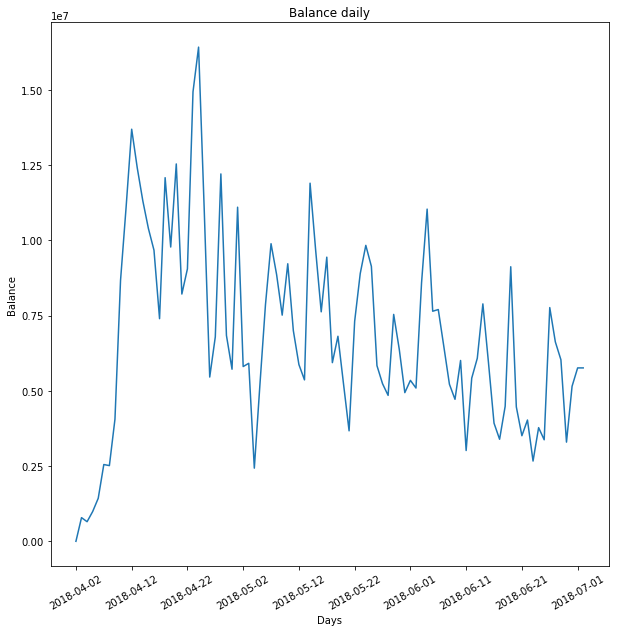

In [209]:
daily_activity(exchange, 'exchange')

User: exchange Address: g1791u5098w9228


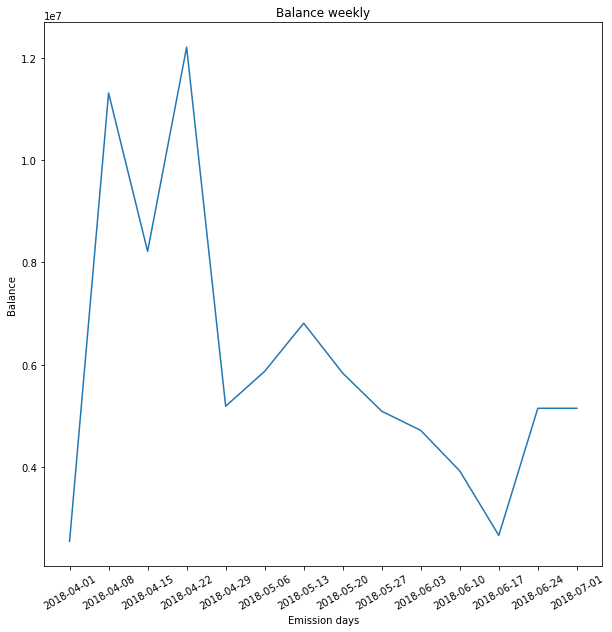

In [210]:
weekly_activity(exchange, 'exchange')

User: buyer Address: g2862x9047t7620


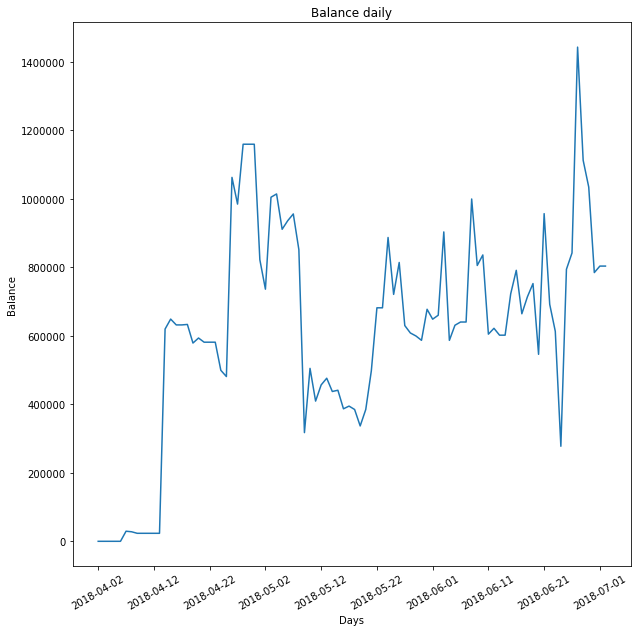

In [211]:
daily_activity(buyer, 'buyer')

User: buyer Address: g2862x9047t7620


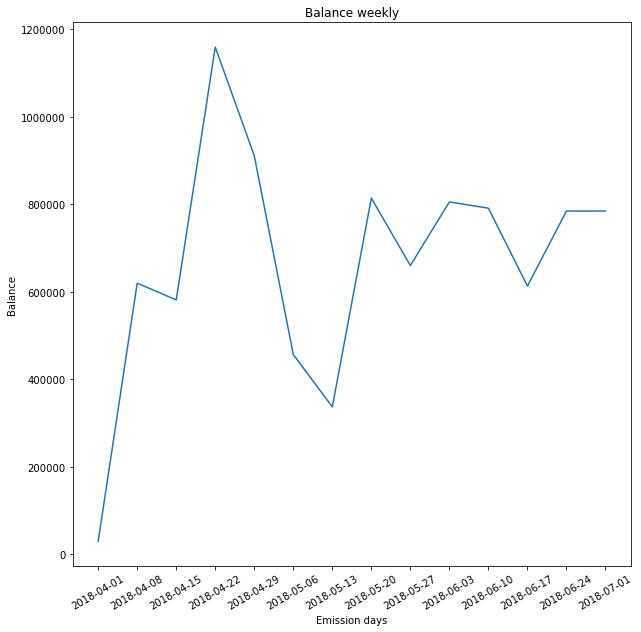

In [212]:
weekly_activity(buyer, 'buyer')

User: hodler Address: g1423r1616u9567


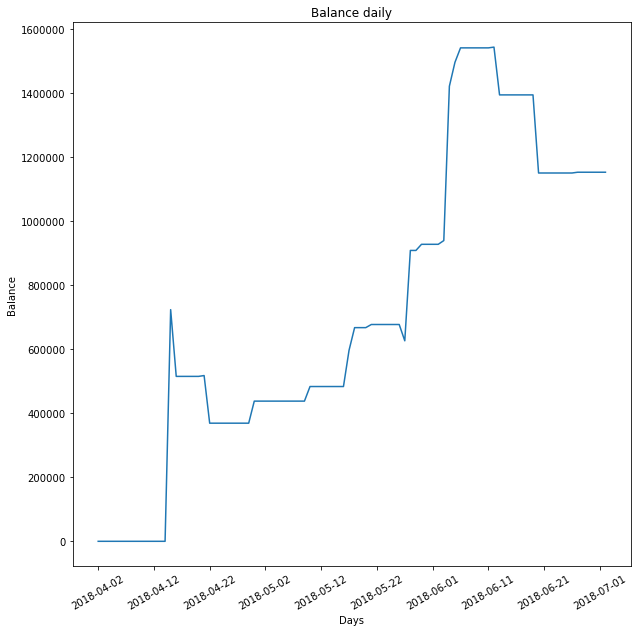

In [213]:
daily_activity(hodler, 'hodler')

User: hodler Address: g1423r1616u9567


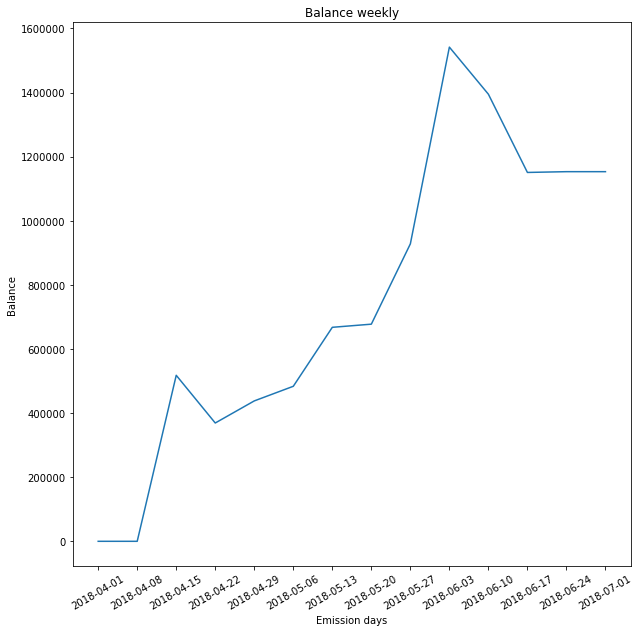

In [214]:
weekly_activity(hodler, 'hodler')

User: seller Address: g5786v1379d3010


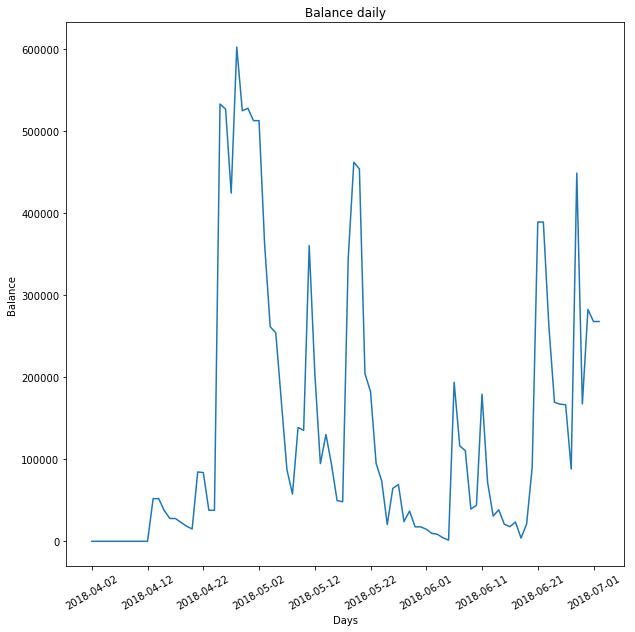

In [215]:
daily_activity(seller, 'seller')

User: seller Address: g5786v1379d3010


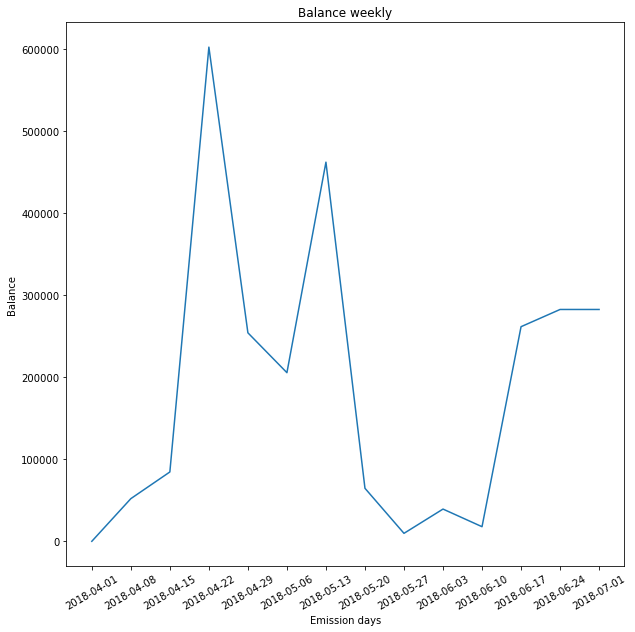

In [216]:
weekly_activity(seller, 'seller')

User: business Address: g6567s7669t5663


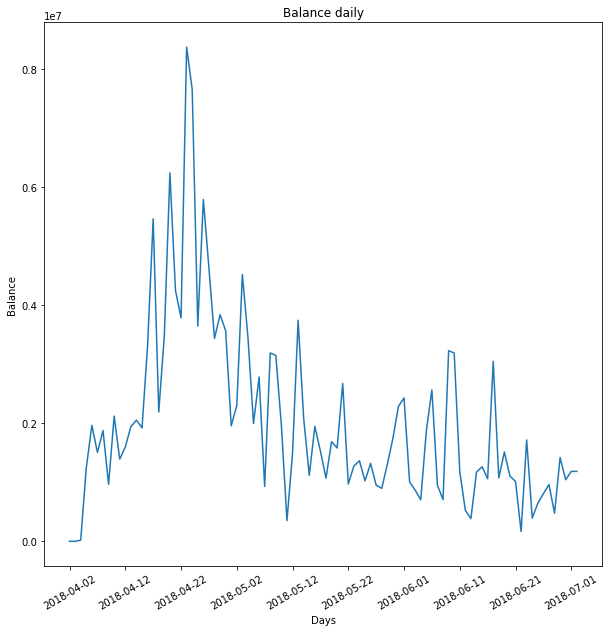

In [219]:
daily_activity(businesses[1], 'business')

User: business Address: g6567s7669t5663


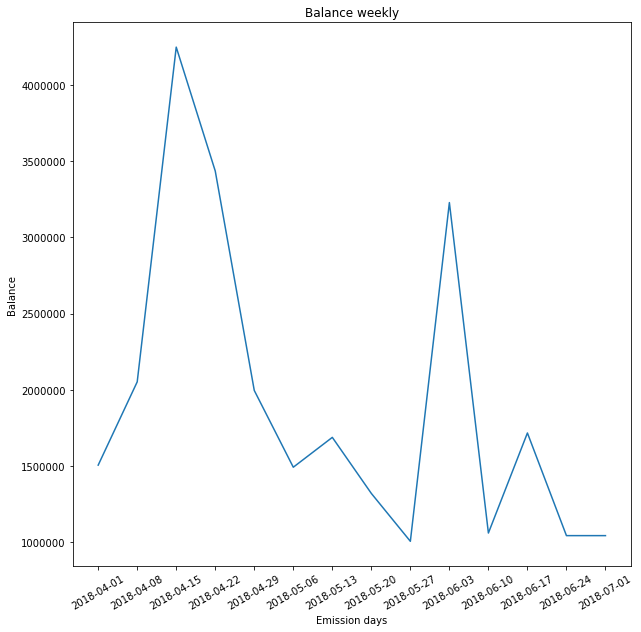

In [220]:
weekly_activity(businesses[1], 'business')

## Fees and transaction count

In [221]:
total_fees_paid = 0
for j in emission_data['2018-07-01']:
    total_fees_paid += j[7]
    
print('Total fees:', total_fees_paid, 'Transaction count:', total_fees_paid/20)

Total fees: 1923200.0 Transaction count: 96160.0


## Sum of account activities in the system weekly

[0.8, 0.9999887467999997, 0.9996878699569993, 0.9988658477949999, 0.9977744341810016, 0.9967047817599991, 0.9957720331900005, 0.9949093319800002, 0.9942103320000003, 0.9935140127, 0.9928518277000004, 0.9922309949000006, 0.9916894077000005, 0.9911774707999993]


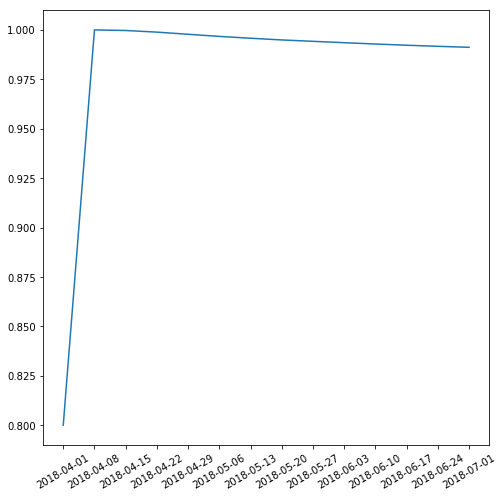

In [222]:
activities = []
for day in emission_days:
    total_activity = 0
    for j in emission_data[day]:
        total_activity += j[4]
    
    activities.append(total_activity)
print(activities)
plt.plot(activities)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(range(len(emission_days)), emission_days, rotation=30)
plt.show()

## Node activity weekly 

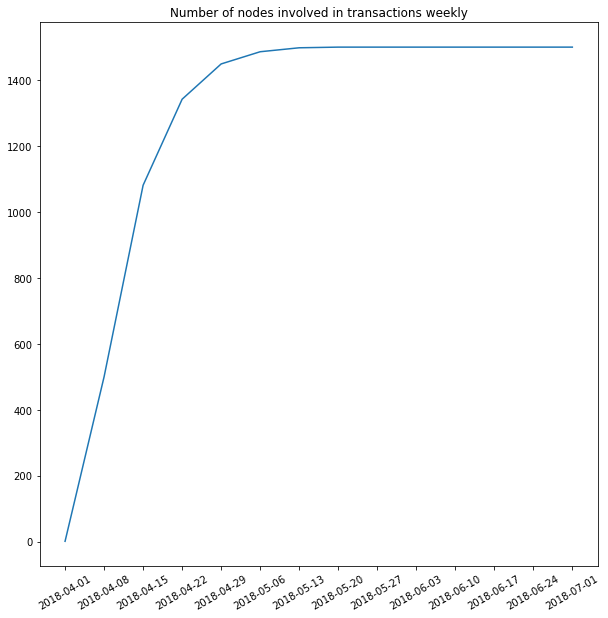

In [78]:
#График активности нод в неделю
active_nodes_weekly = [len(emission_data[day]) for day in emission_days]
plt.plot(active_nodes_weekly)
plt.title('Number of nodes involved in transactions weekly')
plt.xticks(range(len(emission_days)), emission_days, rotation=30)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## 20% of tokens held by the richest wallets

In [223]:
top_twenty_percent = 0
j = 0
while top_twenty_percent < 0.2*total_sum_end:
    top_twenty_percent += sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][1]
    #print(sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][0],\
          #sorted(emission_data['2018-07-01'], key = lambda x: x[1])[::-1][j][1])
    j +=1
print(j,'wallets', top_twenty_percent, 'volume of tokens')

64 wallets 201572240.0 volume of tokens


In [12]:
business_dynamics = {}
for day in emission_days:
    business_dynamics[day] = []
    for b in businesses:
        bdays = [d[0] for d in emission_data[day]]
        if b in bdays:
            business_dynamics[day].append(emission_data[day][bdays.index(b)])

## Emission received by businesses

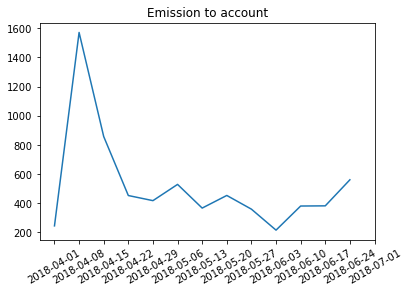

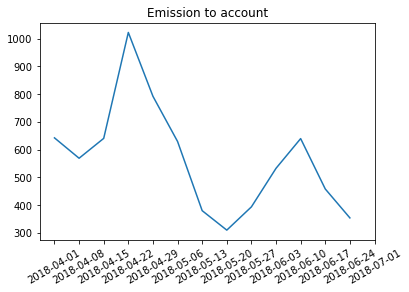

In [231]:
#График размера выплат в неделю для 
business_plots = {}
for b in businesses[0:2]:
    business_plots[b] = []
    for day in emission_days[1:]:
        business_plots[b].append(business_dynamics[day][businesses.index(b)])
for b in businesses[0:2]:
    plt.plot([i[5] for i in business_plots[b]])
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.title('Emission to account')
    plt.show()

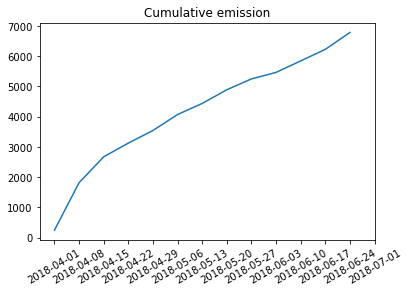

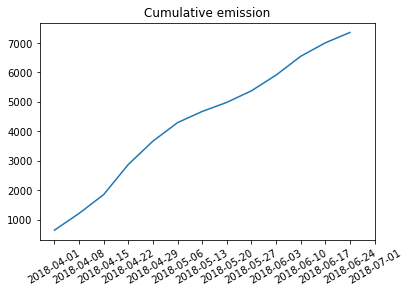

In [232]:
for b in businesses[0:2]:
    plt.plot([i[6] for i in business_plots[b]])
    plt.xticks(range(len(emission_days)), emission_days, rotation=30)
    plt.title('Cumulative emission')
    plt.show()

In [48]:
'''
fees_paid_by_attackers = 0
total_emission_to_attackers = 0
fees_paid_by_businesses = 0
total_emission_to_businesses = 0
fees_paid_by_rest = 0
total_emission_to_rest = 0
wealth_attackers = 0
wealth_businesses = 0
wealth_rest = 0

for address in emission_data['2018-04-24']:
    if address[0] in attackers:
        fees_paid_by_attackers += address[7]
        total_emission_to_attackers += address[6]
        wealth_attackers += address[1]
    elif address[0] in businesses:
        fees_paid_by_businesses += address[7]
        total_emission_to_businesses += address[6]
        wealth_businesses += address[1]
    else:
        fees_paid_by_rest += address[7]
        total_emission_to_rest += address[6]
        wealth_rest += address[1]
        
print(fees_paid_by_attackers, 'fees_paid_by_attackers')
print(total_emission_to_attackers, 'total_emission_to_attackers')
print(fees_paid_by_attackers/len(attackers),'average fee')
print(total_emission_to_attackers/len(attackers),'average emission')
print(wealth_attackers, 'wealth attackers')
print(len(attackers), 'attackers')
print('\n')
print(fees_paid_by_businesses, 'fees_paid_by_businesses')
print(total_emission_to_businesses, 'total_emission_to_businesses')
print(fees_paid_by_businesses/len(businesses),'average fee')
print(total_emission_to_businesses/len(businesses),'average emission')
print(wealth_businesses, 'wealth_businesses')
print(len(businesses), 'businesses')
print('\n')
print(fees_paid_by_rest, 'fees_paid_by_rest')
print(total_emission_to_rest, 'total_emission_to_rest')
print((fees_paid_by_rest/(len(emission_data['2018-04-24'])-len(attackers)-len(businesses))),'average fee')
print((total_emission_to_rest/(len(emission_data['2018-04-24'])-len(attackers)-len(businesses))),'average emission')
print(wealth_rest, 'wealth_rest')
print((len(emission_data['2018-04-24'])-len(attackers)-len(businesses)), 'rest')
'''

88960.0 fees_paid_by_attackers
28091.713769999995 total_emission_to_attackers
889.6 average fee
280.91713769999996 average emission
16194496.675099999 wealth attackers
100 attackers


54660.0 fees_paid_by_businesses
1415.5180000000003 total_emission_to_businesses
6832.5 average fee
176.93975000000003 average emission
398462.89999999997 wealth_businesses
8 businesses


625500.0 fees_paid_by_rest
152789.5840000002 total_emission_to_rest
449.3534482758621 average fee
109.7626321839082 average emission
82637956.61100003 wealth_rest
1392 rest


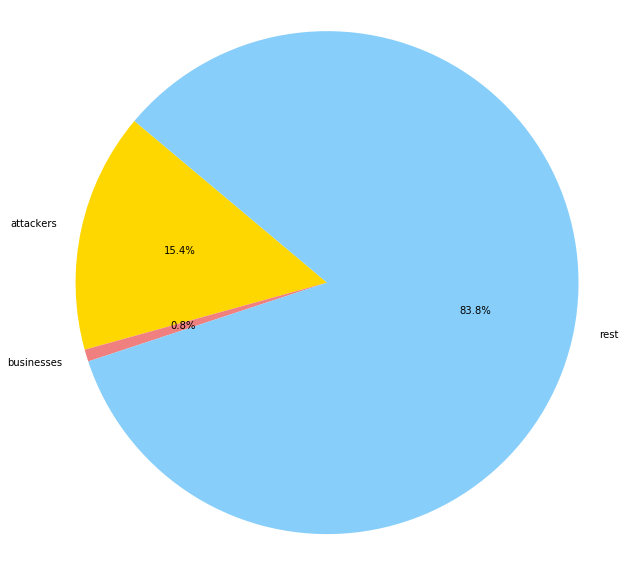

In [45]:
'''
labels = 'attackers', 'businesses', 'rest'
sizes = [total_emission_to_attackers, total_emission_to_businesses, total_emission_to_rest]
colors = ['gold', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
 
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()
'''

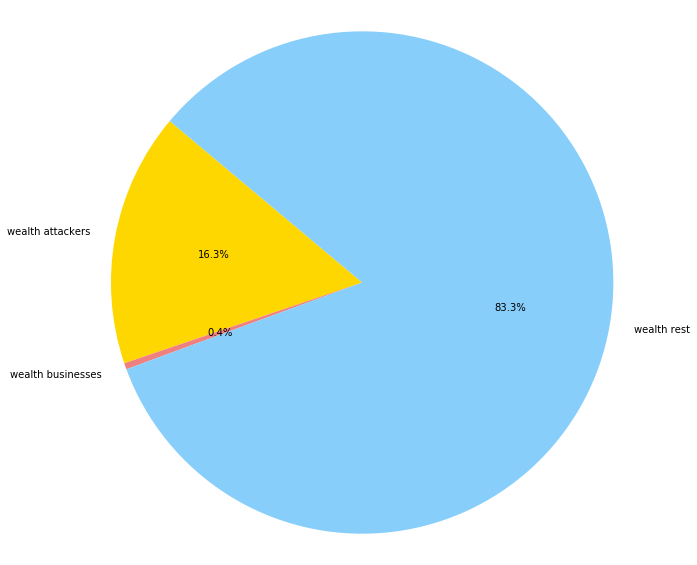

In [46]:
'''
labels = 'wealth attackers', 'wealth businesses', 'wealth rest'
sizes = [wealth_attackers, wealth_businesses, wealth_rest]
colors = ['gold', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
 
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()
'''